# Visualization of spatial data using KeplerGL

In [ ]:
from keplergl import KeplerGl 
from geopandas import GeoDataFrame
import geopandas as gpd
import pandas as pd
import osmnx as ox

# KeplerGl consumes lot of time and space, not advisable to use it for visualization purposes of huge datasets.

def visualize_file(shape, to_crs_value = None):
    
    map = KeplerGl(height=500)
    gpdshape1 = gpd.read_file(shape)
    
    if(to_crs_value != None):
        gpdshape1.crs = "EPSG:4326"
        
    map.add_data(data=gpdshape1, name=shape)
    shape = shape.split('/')[-1]
    file_name = shape.split('.')[-2]
    map.save_to_html(file_name='Visualizations/' + file_name + '.html', read_only=True)    
    
def  visualize_join(shape_1, shape_2):
    
    map_1 = KeplerGl(height=500)
    gpdshape1 = gpd.read_file(shape_1)
    shape_1 = shape_1.split('/')[-1]
    file_1 = shape_1.split('.')[-2]
    gpdshape1.crs = "EPSG:4326"
    
    map_2 = KeplerGl(height=500)
    gpdshape2 = gpd.read_file(shape_2)
    shape_2 = shape_2.split('/')[-1]
    file_2 = shape_2.split('.')[-2]
    
    map_3 = KeplerGl(height=500)
    join_result = gpd.sjoin(gpdshape1, gpdshape2, how="inner", op='contains')
    map_3.add_data(data=join_result, name="join_result")
    map_3.save_to_html(file_name='Visualizations/'+file_1+'_join_'+file_2+'.html', read_only=True)

In [ ]:
visualize_file("Datasets/shape_files/gadm36_IND_0.shp", 4362)

In [ ]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://geopandas.org/_images/overlay_operations.png")

# Spatial Join on CPU and GPU without indexing and splitting

In [1]:
import time
import geopandas as gpd
from numba.extending import overload
import matplotlib.pyplot as plt

def sjoin_without_indexing(data_1, data_2, device = 'CPU', plot = True):
    start_time = time.time()
    join_result = gpd.sjoin(data_1, data_2, how="inner", op='intersects')
    end_time = time.time()
    print("S-join without splitting on {0} = {1}".format(device, end_time - start_time))
    
    if plot:
        f, ax = plt.subplots(figsize=(10, 10))
        
        data_1.plot(ax=ax, color='#99ff99')
        data_2.plot(ax=ax, color='#99ddff')
        join_result.plot(ax=ax, color='red')
        
        plt.show()
        
    return join_result

@overload(sjoin_without_indexing)
def gpu_sjoin_without_indexing(data1, data2, plot = True):
    return sjoin_without_indexing(data1, data2, device = 'GPU', plot = plot)

S-join without splitting on GPU = 5.957646608352661


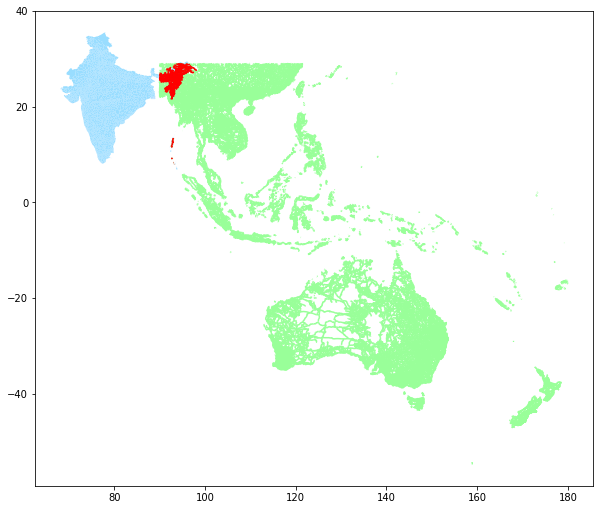

Number of points in result: 1179


In [2]:
from geopandas import GeoDataFrame
import geopandas as gpd
import pandas as pd

gdb_data = gpd.read_file("../Working_code/Datasets/Geodatabase_format/gROADS-v1-oceania-east.gdb")
data_3 = gpd.read_file("../Working_code/Datasets/shape_files/gadm36_IND_3.shp").set_crs(gdb_data.crs)

std_result = gpu_sjoin_without_indexing(gdb_data, data_3, plot = True)
print("Number of points in result:", len(std_result))

In [4]:
data_3

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,GID_3,NAME_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3,geometry
0,IND,India,IND.1_1,Andaman and Nicobar,None,IND.1.1_1,Nicobar Islands,None,IND.1.1.1_1,n.a. ( 2304),None,None,Taluk,Taluk,None,None,"MULTIPOLYGON (((92.78778 9.24417, 92.78889 9.2..."
1,IND,India,IND.1_1,Andaman and Nicobar,None,IND.1.2_1,North and Middle Andaman,None,IND.1.2.1_1,n.a. ( 2178),None,None,Taluk,Taluk,None,None,"MULTIPOLYGON (((93.64841 14.93487, 93.64917 14..."
2,IND,India,IND.1_1,Andaman and Nicobar,None,IND.1.3_1,South Andaman,None,IND.1.3.1_1,n.a. ( 2178),None,None,Taluk,Taluk,None,None,"MULTIPOLYGON (((93.83970 12.32082, 93.85775 12..."
3,IND,India,IND.2_1,Andhra Pradesh,None,IND.2.1_1,Anantapur,None,IND.2.1.1_1,Anantapur,None,None,Taluk,Taluk,None,None,"POLYGON ((77.35452 14.52155, 77.34958 14.52136..."
4,IND,India,IND.2_1,Andhra Pradesh,None,IND.2.1_1,Anantapur,None,IND.2.1.2_1,Dharmavaram,None,None,Taluk,Taluk,None,None,"POLYGON ((77.35341 14.27068, 77.35244 14.28055..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,IND,India,IND.36_1,West Bengal,None,IND.36.19_1,South 24 Parganas,None,IND.36.19.1_1,Diamond Harbour,None,None,Taluk,Taluk,None,None,"MULTIPOLYGON (((88.41639 21.89883, 88.41638 21..."
2336,IND,India,IND.36_1,West Bengal,None,IND.36.19_1,South 24 Parganas,None,IND.36.19.2_1,n.a. ( 1187),None,None,Taluk,Taluk,None,None,"MULTIPOLYGON (((88.56661 21.91009, 88.56715 21..."
2337,IND,India,IND.36_1,West Bengal,None,IND.36.19_1,South 24 Parganas,None,IND.36.19.3_1,n.a. ( 1229),None,None,Taluk,Taluk,None,None,"MULTIPOLYGON (((88.64000 21.92168, 88.64027 21..."
2338,IND,India,IND.36_1,West Bengal,None,IND.36.20_1,Uttar Dinajpur,None,IND.36.20.1_1,Islampur,None,None,Taluk,Taluk,None,None,"POLYGON ((88.18713 26.02453, 88.18711 26.02406..."


# Spatial Join on CPU and GPU with indexing and without splitting

In [ ]:
from geopandas import GeoDataFrame
import geopandas as gpd
import pandas as pd
from descartes import PolygonPatch
from shapely.geometry import Point, Polygon, MultiPolygon

from numba.extending import overload

import matplotlib.pyplot as plt
import time

def sjoin_with_indexing(data_1, data_2, device = 'CPU', plot = True):
    
#     convert input data to Multipolygon as needed by sjoin        
    geometry_2 = data_2['geometry'].iloc[0]
    if isinstance(geometry_2, Polygon):
        geometry_2 = MultiPolygon([geometry_2])  
        
    geometry_1 = data_1['geometry'].iloc[0]
    if isinstance(geometry_1, Polygon):
        geometry_1 = MultiPolygon([geometry_1])
        
    start_time = time.time()
    
#     indexing data_1
    sindex_1 = data_1.sindex
    sindex_2 = data_2.sindex
    
#     filter phase
    possible_indices = list(sindex_2.query(geometry_1, predicate = 'crosses'))
    print("Number of possible indices: ", len(possible_indices))
    possible_matches = data_1.iloc[possible_indices]
    
#     refinement phase
    precise_matches = possible_matches[possible_matches.intersects(geometry_2)]
    print("Number of precise matches: ", len(precise_matches))
    # cannot use index structure of data 2 for intersects operation, accepts Series datatype only     
    end_time = time.time()
    
#     plotting the sjoin results 
    points_within_geometry = precise_matches
    points_outside_geometry = data_1[~data_1.isin(points_within_geometry)]
    
    if plot:
        points_within_geometry.plot(ec = "#0b1878", figsize=(15,15))
    
    print("S-join without splitting on {0} = {1}".format(device, end_time - start_time))
    
@overload(sjoin_with_indexing)
def gpu_sjoin_with_indexing(data_1, data_2, device = 'CPU', plot = True):
    sjoin_with_indexing(data_1, data_2, device = 'GPU', plot = True)
    

gdb_data = gpd.read_file("Datasets/Geodatabase_format/gROADS-v1-oceania-east.gdb") # MultiLine
data_3 = gpd.read_file("Datasets/shape_files/gadm36_IND_3.shp").set_crs(gdb_data.crs) # MultiPolygon

# sjoin_with_indexing(gdb_data, data_3, plot = False)

gpu_sjoin_with_indexing(gdb_data, data_3)

# Output isn't correct

# Convert wkt to GeodataFrames

In [ ]:
from shapely import wkt

wkt_csv_data = pd.read_csv("Datasets/wkt_format/primaryroads_wkt.csv")
wkt_csv_data = wkt_csv_data[].apply(wkt.loads)

wkt_gdf_data = gpd.GeoDataFrame(wkt_csv_data)

wkt_gdf_data.plot(ec = "#0b1878", figsize=(24,24))

In [ ]:
import osmnx as ox
data_1 = ox.geocode_to_gdf('Los Angeles, California, USA') # Multipolygon
data_1.plot()
print(data_1.bounds)